# Opinion Dynamics

In this notebook we tested different OD models and compared them with synthetic networks
 
* Voter
* Majority Rule
* Sznajd


## Import libraries

In [12]:
import ndlib
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op



## Edgelist import 

In [13]:
df = pd.read_csv("../data_collection/data/df_nickname.csv", skipinitialspace=True, na_values='?', keep_default_na=True)   
def read_net_w(filename):
    g = nx.MultiGraph()
    with open(filename) as f:
        f.readline()
        for l in f:
            l = l.split(",")
     #       print(l)
            g.add_edge(l[1], l[2], weight=int(float(l[3].rstrip('\n'))))
    return g

In [14]:
g = read_net_w("../data_collection/data/df_nickname.csv")

In [15]:
g.remove_edges_from(nx.selfloop_edges(g))

In [16]:
ws = nx.watts_strogatz_graph(52795, k=4, p=0, seed = 42)
er = nx.read_gexf("../network_analysis/json/ER.gexf")
ba = nx.barabasi_albert_graph(52795, 2, seed = 42)

## Voter Model

* RW network

In [17]:
model = op.VoterModel(g, seed = 2)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.5)
model.set_initial_status(config)


iterations = model.iteration_bunch(2000)
trends = model.build_trends(iterations)

In [19]:
viz = DiffusionTrend(model, trends)
viz.plot()
plt.show()
#plt.savefig("plots/OD/Voter.png")

<ipython-input-19-bea0011ab74a>:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


* BA 

In [9]:
model = op.VoterModel(ba, seed = 2)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.5)
model.set_initial_status(config)


iterations = model.iteration_bunch(2000)
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
viz.plot()
plt.savefig("plots/OD/VoterBA.png")

100%|██████████| 2000/2000 [00:49<00:00, 40.64it/s]
C:\Users\Erica\anaconda3\lib\site-packages\ndlib\viz\mpl\DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


* WS

In [10]:
model = op.VoterModel(ws, seed = 2)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.5)
model.set_initial_status(config)


iterations = model.iteration_bunch(2000)
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
viz.plot()
plt.savefig("plots/OD/VoterWS.png")

100%|██████████| 2000/2000 [00:46<00:00, 43.41it/s]
C:\Users\Erica\anaconda3\lib\site-packages\ndlib\viz\mpl\DiffusionViz.py:89: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


## Majority Rule

* RW

In [ ]:
model = op.MajorityRuleModel(g)
config = mc.Configuration()
config.add_model_parameter('q', 5)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(2000)
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
viz.plot()
plt.savefig("plots/OD/MajorityRule.png")

* BA

In [ ]:
model = op.MajorityRuleModel(ba)
config = mc.Configuration()
config.add_model_parameter('q', 5)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(2000)
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
viz.plot()
plt.savefig("plots/OD/MajorityRuleBA.png")

* WS

In [ ]:
model = op.MajorityRuleModel(ws)
config = mc.Configuration()
config.add_model_parameter('q', 5)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(2000)
trends = model.build_trends(iterations)

viz = DiffusionTrend(model, trends)
viz.plot()
plt.savefig("plots/OD/MajorityRuleWS.png")

## Sznajd

* RW

100%|██████████| 2000/2000 [01:43<00:00, 19.35it/s]


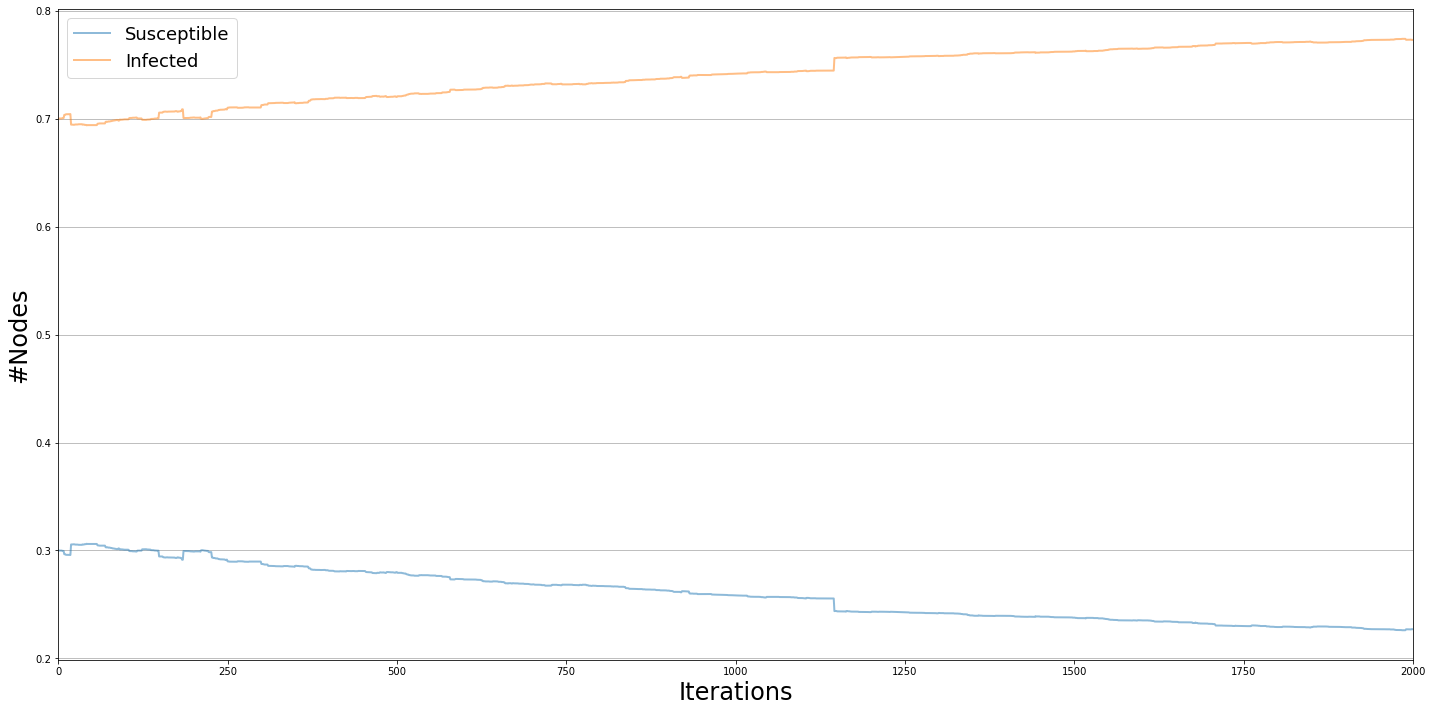

<Figure size 432x288 with 0 Axes>

In [23]:
model = op.SznajdModel(g)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.7)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(2000)
trends = model.build_trends(iterations)

%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()
plt.savefig("plots/OD/Sznajd_RW.png")

* BA

100%|██████████| 2000/2000 [00:45<00:00, 44.09it/s]


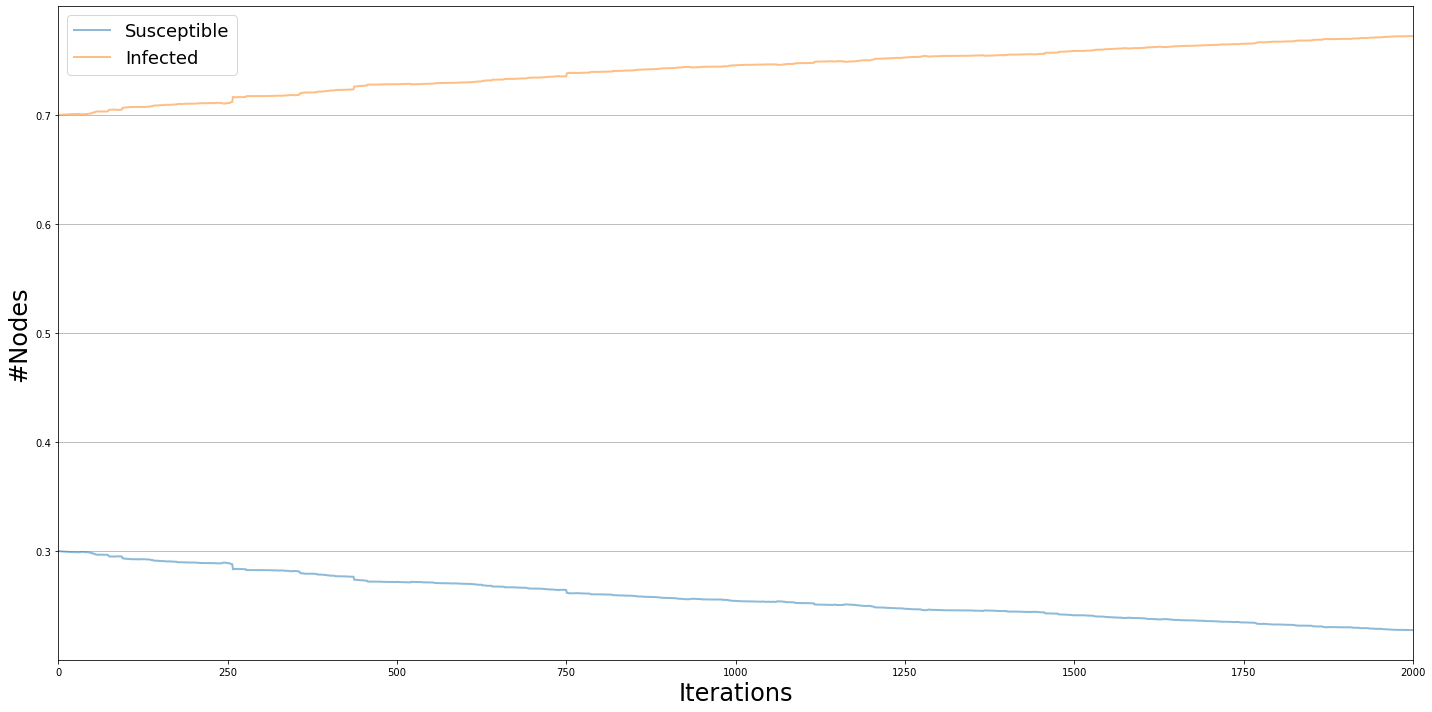

<Figure size 432x288 with 0 Axes>

In [22]:
model = op.SznajdModel(ba)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.7)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(2000)
trends = model.build_trends(iterations)

%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()
plt.savefig("plots/OD/Sznajd_BA.png")

* WS

100%|██████████| 2000/2000 [00:42<00:00, 47.42it/s]


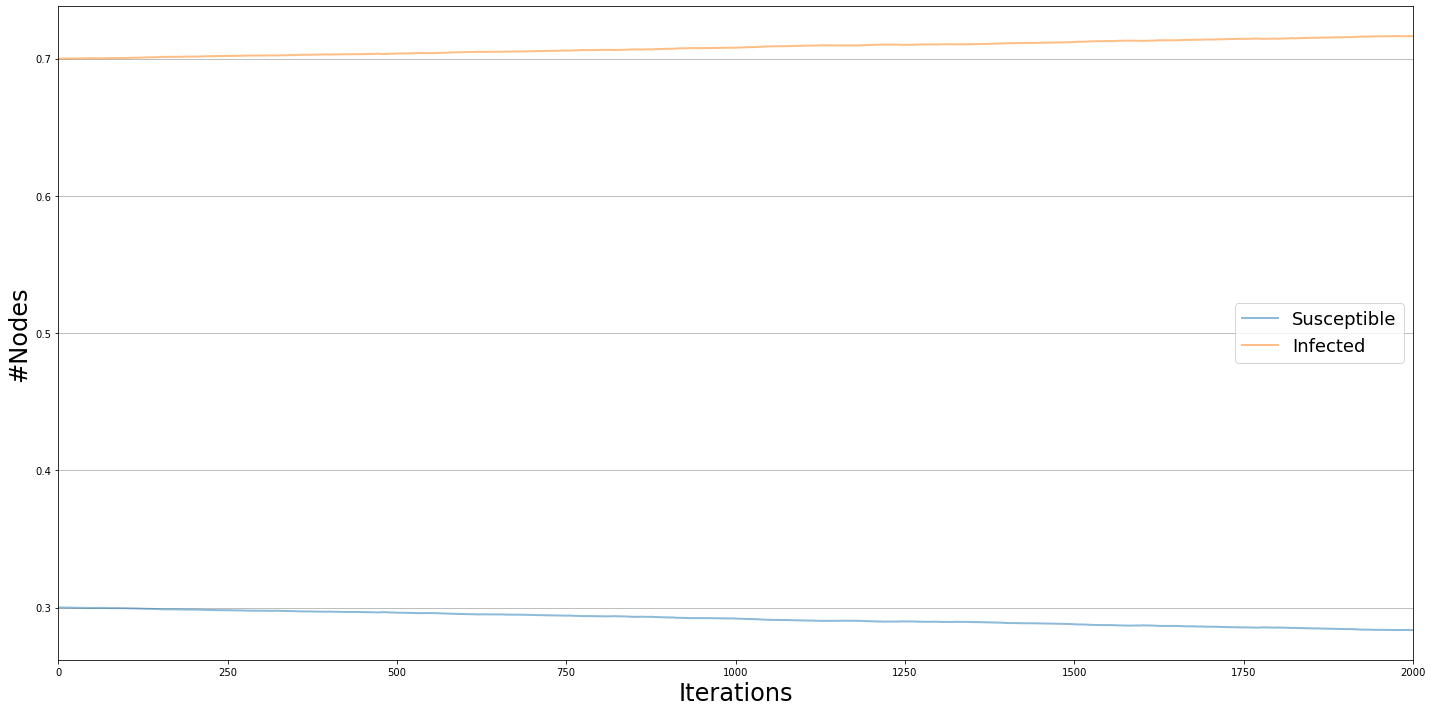

<Figure size 432x288 with 0 Axes>

In [21]:
model = op.SznajdModel(ws)
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.7)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(2000)
trends = model.build_trends(iterations)

%matplotlib inline
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
viz = DiffusionTrend(model, trends)
viz.plot()
plt.savefig("plots/OD/Sznajd_WS.png")

In [18]:
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = op.AlgorithmicBiasModel(g)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.32)
config.add_model_parameter("gamma", 1)
model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(200)

100%|██████████| 200/200 [02:09<00:00,  1.54it/s]
